## Final Project Submission

Please fill out:
* Student name: Mindy Jen
* Student pace: full time, ds-ft-online-05262020
* Scheduled project review date/time: Sep. 24th, 2020/12:45-13:30 (CDT)
* Instructor name: Yish Lim
* Blog post URL: in progress
* fine data: [Kaggle](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia)
* full data: [Mendeley](https://data.mendeley.com/datasets/rscbjbr9sj/3)

In [1]:
import os, shutil
import time
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img
from keras import models
from keras import layers
from keras import optimizers
from keras.applications import VGG19

np.random.seed(123)

In [2]:
train_folder = 'split/train'
test_folder = 'split/test'
val_folder = 'split/validation'

In [3]:
datagen = ImageDataGenerator(rescale=1./255) 
batch_size = 5

## VGG19: Feature extraction

In [4]:
vgg19_base = VGG19(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [5]:
vgg19_base.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [6]:
def extract_features(directory, sample_amount):
    features = np.zeros(shape=(sample_amount, 4, 4, 512)) 
    labels = np.zeros(shape=(sample_amount))
    generator = datagen.flow_from_directory(directory, target_size=(150, 150), batch_size=5, class_mode='binary')
    print(generator)
    i=0
    for inputs_batch, labels_batch in generator:
        #print('i:',i,labels_batch)
        features_batch = vgg19_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch 
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        #print('\t',features.shape,' ',labels.shape)
        i = i + 1
        if i * batch_size >= sample_amount:
            break
    return features, labels

In [7]:
# You should be able to divide sample_amount by batch_size
train_features, train_labels = extract_features(train_folder, 3410) 
train_features = np.reshape(train_features, (3410, 4 * 4 * 512))

Found 4685 images belonging to 2 classes.


In [8]:
validation_features, validation_labels = extract_features(val_folder, 420) 
validation_features = np.reshape(validation_features, (420, 4 * 4 * 512))

Found 586 images belonging to 2 classes.


In [9]:
test_features, test_labels = extract_features(test_folder, 420)
test_features = np.reshape(test_features, (420, 4 * 4 * 512))

Found 585 images belonging to 2 classes.


In [10]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4*4*512))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
start = datetime.datetime.now()
print('program starts, current time:')
print(start)
history = model.fit(train_features, train_labels, epochs=100, batch_size=5, validation_data=(validation_features, validation_labels))
end = datetime.datetime.now()
print('program ends, current time:')
print(end)
elapsed = end - start
print('Training took a total of {}'.format(elapsed))

program starts, current time:
2020-09-12 16:46:10.565902
Epoch 1/100
682/682 [==============================] - 43s 63ms/step - loss: 0.2141 - accuracy: 0.9164 - val_loss: 0.2026 - val_accuracy: 0.9310
Epoch 2/100
682/682 [==============================] - 35s 51ms/step - loss: 0.1511 - accuracy: 0.9431 - val_loss: 0.1679 - val_accuracy: 0.9381
Epoch 3/100
682/682 [==============================] - 33s 48ms/step - loss: 0.1302 - accuracy: 0.9522 - val_loss: 0.1905 - val_accuracy: 0.9310
Epoch 4/100
682/682 [==============================] - 33s 48ms/step - loss: 0.1195 - accuracy: 0.9572 - val_loss: 0.2176 - val_accuracy: 0.9214
Epoch 5/100
682/682 [==============================] - 34s 51ms/step - loss: 0.1111 - accuracy: 0.9642 - val_loss: 0.2317 - val_accuracy: 0.9310
Epoch 6/100
682/682 [==============================] - 36s 53ms/step - loss: 0.1013 - accuracy: 0.9654 - val_loss: 0.1891 - val_accuracy: 0.9357
Epoch 7/100
682/682 [==============================] - 39s 57ms/step - lo

Epoch 57/100
682/682 [==============================] - 28s 41ms/step - loss: 0.0172 - accuracy: 0.9974 - val_loss: 0.4521 - val_accuracy: 0.9333
Epoch 58/100
682/682 [==============================] - 28s 41ms/step - loss: 0.0172 - accuracy: 0.9962 - val_loss: 0.4881 - val_accuracy: 0.9310
Epoch 59/100
682/682 [==============================] - 28s 41ms/step - loss: 0.0151 - accuracy: 0.9965 - val_loss: 0.4679 - val_accuracy: 0.9381
Epoch 60/100
682/682 [==============================] - 28s 41ms/step - loss: 0.0151 - accuracy: 0.9971 - val_loss: 0.4500 - val_accuracy: 0.9333
Epoch 61/100
682/682 [==============================] - 28s 41ms/step - loss: 0.0116 - accuracy: 0.9977 - val_loss: 0.5144 - val_accuracy: 0.9429
Epoch 62/100
682/682 [==============================] - 28s 41ms/step - loss: 0.0132 - accuracy: 0.9974 - val_loss: 0.4833 - val_accuracy: 0.9381
Epoch 63/100
682/682 [==============================] - 28s 40ms/step - loss: 0.0133 - accuracy: 0.9974 - val_loss: 0.5124 -

In [12]:
results_train = model.evaluate(train_features, train_labels)
results_train

107/107 [==============================] - 2s 18ms/step - loss: 0.0057 - accuracy: 0.9991


[0.005686699878424406, 0.9991202354431152]

In [13]:
results_test = model.evaluate(test_features, test_labels)
results_test

14/14 [==============================] - 0s 17ms/step - loss: 0.6018 - accuracy: 0.9429


[0.6018176674842834, 0.9428571462631226]

In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Using VGG-19 I'm able to get test set performance up to almost 95.5%.

In [15]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

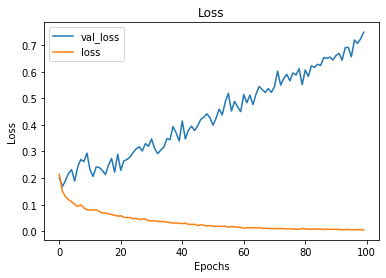

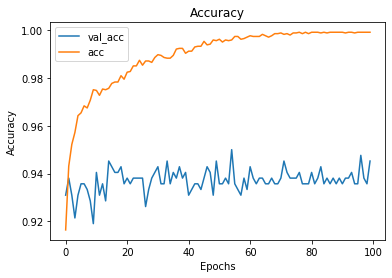

In [16]:
visualize_training_results(history)